In [2]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [8]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Get a summary of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
# Basic statistics
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [14]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [16]:
# Number of duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [18]:
#Clean and Preprocess Data
#Split CarName into Brand and Model (if required)

df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

In [20]:
#  Fix typos
df['CarBrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota'
}, inplace=True)

C:\Users\aparn\AppData\Local\Temp\ipykernel_8212\1223940328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].replace({


In [22]:
#Convert Categorical Columns to Category or Encode
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarBrand'],
      dtype='object')


In [24]:
#Savung the new data set
df.to_csv("cleaned_car_data.csv", index=False)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [28]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Feature scaling (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n  MSE: {mse:.2f}\n  R2 Score: {r2:.2f}\n")

In [36]:
#1. Linear Regression

lr = LinearRegression()
evaluate_model("Linear Regression", lr, X_train, X_test, y_train, y_test)

Linear Regression:
  MSE: 26222188.12
  R2 Score: 0.67



In [38]:
# 2. Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)
evaluate_model("Decision Tree Regressor", dt, X_train, X_test, y_train, y_test)

Decision Tree Regressor:
  MSE: 11990327.12
  R2 Score: 0.85



In [40]:
#3. Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model("Random Forest Regressor", rf, X_train, X_test, y_train, y_test)

Random Forest Regressor:
  MSE: 3725492.24
  R2 Score: 0.95



In [42]:
# 4. Gradient Boosting Regressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
evaluate_model("Gradient Boosting Regressor", gb, X_train, X_test, y_train, y_test)

Gradient Boosting Regressor:
  MSE: 5266890.18
  R2 Score: 0.93



In [44]:
# 5. Support Vector Regressor (SVR)

svr = SVR()
evaluate_model("Support Vector Regressor", svr, X_train_scaled, X_test_scaled, y_train, y_test)

Support Vector Regressor:
  MSE: 86979748.89
  R2 Score: -0.10



In [46]:
# Best Model Finding
results = []

def evaluate_and_store(name, model, X_train, X_test, y_train, y_test, scale=False):
    if scale:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Model': name, 'MSE': mse, 'R2 Score': r2})

# Call for each model
evaluate_and_store("Linear Regression", lr, X_train, X_test, y_train, y_test)
evaluate_and_store("Decision Tree", dt, X_train, X_test, y_train, y_test)
evaluate_and_store("Random Forest", rf, X_train, X_test, y_train, y_test)
evaluate_and_store("Gradient Boosting", gb, X_train, X_test, y_train, y_test)
evaluate_and_store("SVR", svr, X_train, X_test, y_train, y_test, scale=True)

# Display results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2 Score", ascending=False))

               Model           MSE  R2 Score
2      Random Forest  3.725492e+06  0.952808
3  Gradient Boosting  5.266890e+06  0.933283
1      Decision Tree  1.199033e+07  0.848116
0  Linear Regression  2.622219e+07  0.667838
4                SVR  8.697975e+07 -0.101790


C:\Users\aparn\AppData\Local\Temp\ipykernel_8212\3201079206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values(by='R2 Score', ascending=False), x='R2 Score', y='Model', palette='viridis')


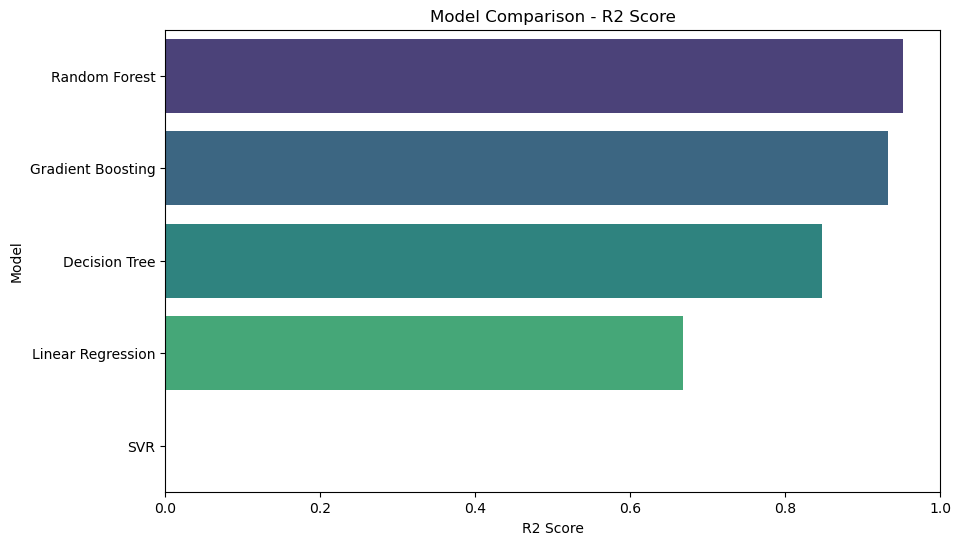

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.sort_values(by='R2 Score', ascending=False), x='R2 Score', y='Model', palette='viridis')
plt.title("Model Comparison - R2 Score")
plt.xlim(0, 1)
plt.show()

# Best Model 
Random Forest
Why Random Forest is the Best:
Highest R² Score (0.95+):
Explains 95% of the variance in car prices. That’s excellent for real-world data.

Lowest MSE (3.73 million):
Produces the most accurate price predictions (on average, smaller errors).

Robustness:
It avoids overfitting better than Decision Tree by aggregating multiple trees (ensemble method).

Handles Non-linear Data Well:
Unlike Linear Regression, Random Forest can learn complex patterns and interactions in data.

Insensitive to Outliers & Missing Data (to some extent):
Works well even if features are not perfectly normalized or cleaned.



In [53]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the Random Forest model (if not already)
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

C:\Users\aparn\AppData\Local\Temp\ipykernel_8212\223037320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='coolwarm')


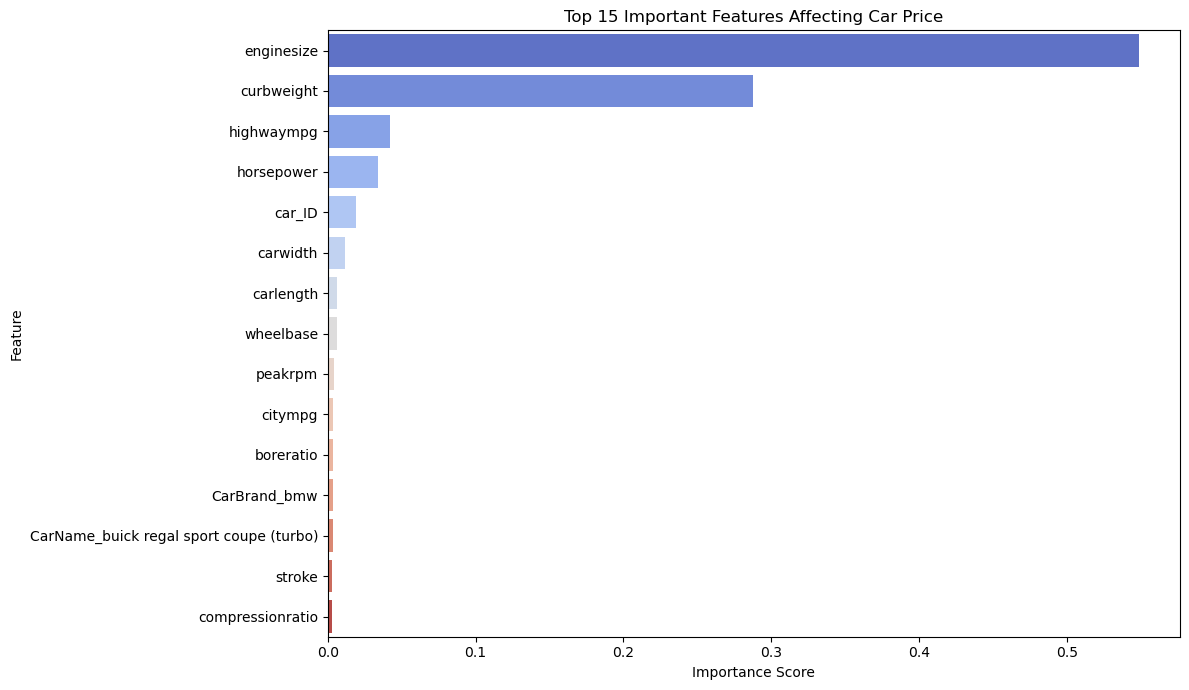

In [55]:
# Plot top 15 important features
plt.figure(figsize=(12, 7))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='coolwarm')
plt.title("Top 15 Important Features Affecting Car Price")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [61]:
# Hyper parametre Tuning
from sklearn.model_selection import GridSearchCV
#Step 1: Define Parameter Grid
# Define parameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [63]:
# Step 2: Apply Grid Search

# Create model
rf_model = RandomForestRegressor(random_state=42)

# Apply grid search with 5-fold CV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='r2')

# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [65]:
# Step 3: Best Parameters and Model
# Show best parameters
print("Best Parameters:", grid_search.best_params_)

# Use best estimator to predict
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [67]:
# Step 4: Evaluate Tuned Model
from sklearn.metrics import mean_squared_error, r2_score

y_pred_tuned = best_rf.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Random Forest:\n  MSE: {mse_tuned:.2f}\n  R2 Score: {r2_tuned:.4f}")

Tuned Random Forest:
  MSE: 3520776.07
  R2 Score: 0.9554


In [69]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Original Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Tuned Random Forest using best estimator from GridSearchCV
# (Make sure grid_search is already fitted)
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['R2 Score', 'MSE'],
    'Original Random Forest': [r2_rf, mse_rf],
    'Tuned Random Forest': [r2_tuned, mse_tuned]
})

# Display table
print(comparison_df)

     Metric  Original Random Forest  Tuned Random Forest
0  R2 Score            9.528084e-01         9.554016e-01
1       MSE            3.725492e+06         3.520776e+06


 Interpretation:
Tuned Random Forest performed slightly better, improving the R² Score from 95.28% to 95.54% — meaning it explains more variance in car prices.

 MSE dropped by about 200,000, which means the model now makes more accurate price predictions.

 This shows that GridSearchCV tuning was effective, even for an already strong model.